In [3]:
import pandas as pd

df = pd.read_parquet("output/geolife_output/trajectories_sparse/date=2025-07-01/part-0.parquet")
print(df)

      user_id              x             y   timestamp  step
0           0  485056.661156  4.420447e+06  1751340752    42
1           0  485056.661156  4.420447e+06  1751340978    43
2           0  485056.661156  4.420447e+06  1751341337    44
3           0  485056.661156  4.420447e+06  1751341778    45
4           0  485056.661156  4.420447e+06  1751342295    47
...       ...            ...           ...         ...   ...
7595      199  485124.694014  4.422019e+06  1751374323   154
7596      199  486402.712400  4.421046e+06  1751398689   235
7597      199  486402.712400  4.421046e+06  1751398821   236
7598      199  486402.712400  4.421046e+06  1751399275   237
7599      199  486398.420451  4.421061e+06  1751410612   275

[7600 rows x 5 columns]


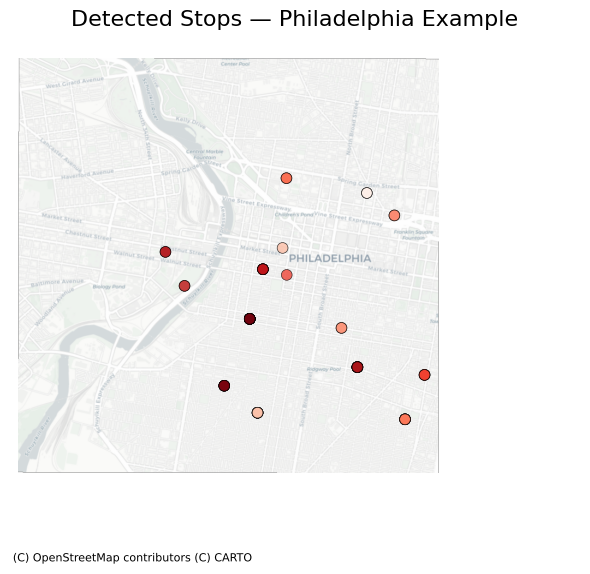

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import shapely.plotting as shp_plt
from nomad.stop_detection.viz import plot_stops, plot_pings, adjust_zoom
import nomad.stop_detection.lachesis as LACHESIS
import nomad.io.base as loader
import time

# 3857
buildings = gpd.read_file("buildings.geojson").to_crs("EPSG:32618")
walkways = gpd.read_file("walkways.geojson").to_crs("EPSG:32618")

import pandas as pd
import numpy as np

filepath_root = 'output/geolife_output/travel_journal'
traj_root = 'output/geolife_output/trajectories_sparse'
tc = {
    "user_id": "user_id",
    "timestamp": "timestamp",
    "x": "x",
    "y": "y"}

users = [0,1,2,3,4]
stops = loader.sample_from_file(filepath_root, format='parquet', users=users, filters = ('date','==', '2025-07-01'), traj_cols=tc)
traj = loader.sample_from_file(traj_root, format='parquet', users=users, filters = ('date','==', '2025-07-01'), traj_cols=tc)


fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot city layers
#buildings.plot(ax=ax, edgecolor='white', linewidth=0.5, color='#2c353c')
#walkways.plot(ax=ax, color='#5e6e78', alpha=0.6)

# Plot detected stops and trajectory points
plot_stops(stops, ax=ax, cmap='Reds', x='x', y='y')
#plot_pings(traj, ax=ax, s=8, point_color='black', cmap='twilight',
#            traj_cols=tc)

ctx.add_basemap(ax, crs=buildings.crs.to_string(), source=ctx.providers.CartoDB.Positron)

adjust_zoom(stops['x'], stops['y'], buffer=1.2, ax=ax)
ax.set_axis_off()
ax.set_title('Detected Stops — Philadelphia Example', fontsize=16)
plt.tight_layout()
plt.savefig('philly_plot_sparse.png', dpi=300, bbox_inches='tight')
plt.show()
